1. `pandas` digunakan untuk manipulasi dan analisis data.
2. `numpy` digunakan untuk komputasi numerik efisien.
3. `LabelEncoder` dari `sklearn.preprocessing` digunakan untuk mengubah label kategori menjadi numerik.
4. `StandardScaler` dari `sklearn.preprocessing` digunakan untuk penskalaan fitur.
5. `train_test_split` dari `sklearn.model_selection` digunakan untuk membagi dataset menjadi data latih dan data uji.
6. `SVC` dari `sklearn.svm` digunakan untuk mengimplementasikan Support Vector Classifier.
7. `accuracy_score`, `classification_report`, dan `confusion_matrix` dari `sklearn.metrics` digunakan untuk mengevaluasi kinerja model.
8. `matplotlib.pyplot` dan `seaborn` digunakan untuk visualisasi data.
9. `make_classification` dari `sklearn.datasets` digunakan untuk membuat dataset sintetis untuk keperluan demonstrasi.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

# Membaca Data

Baris pertama memuat path untuk file CSV yang akan dibaca, yang merupakan data informasi kartu kredit.

Kemudian, data dari file CSV tersebut dibaca menggunakan fungsi `pd.read_csv()` dari pustaka pandas, dan dimuat ke dalam dataframe yang disebut `df`.


In [2]:
csv_path="../Data/credircardinfo.csv"
df=pd.read_csv(csv_path)

Fungsi `head()` dari dataframe (`df`) digunakan untuk menampilkan lima baris pertama dari data. Ini membantu untuk mendapatkan gambaran cepat tentang struktur dan konten dari dataframe.


In [3]:
df.head()

,ID,Age,Gender,Salary,Job,Married,Num_children,type_credit
0,1,25,M,350,Y,N,0,0
1,2,45,M,1300,Y,Y,2,2
2,3,35,F,1000,Y,Y,2,1
3,4,27,M,550,Y,N,0,1
4,5,28,F,500,Y,Y,0,0


Fungsi `df.info()` digunakan untuk memberikan informasi singkat tentang dataframe `df`.

Outputnya mencakup:
- Jumlah total baris dan kolom dalam dataframe.
- Daftar nama kolom beserta tipe datanya.
- Jumlah nilai non-null (tidak kosong) dalam setiap kolom.
- Penggunaan memori yang diperkirakan oleh dataframe.

Ini membantu dalam pemahaman awal tentang struktur dan isi dari dataframe tersebut.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            95 non-null     int64 
 1   Age           95 non-null     int64 
 2   Gender        95 non-null     object
 3   Salary        95 non-null     int64 
 4   Job           95 non-null     object
 5   Married       95 non-null     object
 6   Num_children  95 non-null     int64 
 7   type_credit   95 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ KB


Fungsi `describe()` digunakan untuk menghasilkan ringkasan statistik deskriptif dari dataframe `df`.

Ringkasan statistik tersebut mencakup jumlah data (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50% atau kuartil kedua), kuartil ketiga (75%), dan nilai maksimum (max) dari setiap kolom numerik dalam dataframe.


In [5]:
df.describe()

,ID,Age,Salary,Num_children,type_credit
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,48.000000,41.821053,1170.736842,1.726316,0.926316
std,27.568098,21.492195,1008.575193,1.627177,0.775175
min,1.000000,18.000000,0.000000,0.000000,0.000000
25%,24.500000,28.500000,550.000000,0.000000,0.000000
50%,48.000000,35.000000,900.000000,2.000000,1.000000
75%,71.500000,45.000000,1625.000000,3.000000,2.000000
max,95.000000,120.000000,5000.000000,6.000000,2.000000


# PreProssesing

In [6]:
df.isnull().sum()

ID              0
Age             0
Gender          0
Salary          0
Job             0
Married         0
Num_children    0
type_credit     0
dtype: int64

# Encoding Fitur Kategorikal

Kode ini mengkodekan kolom-kolom tertentu dalam dataframe `df` menggunakan teknik Label Encoding.

1. Kolom 'Gender' dienkripsi menjadi nilai numerik menggunakan objek `LabelEncoder` dari pustaka `sklearn.preprocessing`, dan hasilnya disimpan kembali ke dalam kolom yang sama di dataframe.
2. Kolom 'Married' dienkripsi menggunakan `LabelEncoder`, dan hasilnya juga disimpan kembali ke dalam kolom yang sama di dataframe.
3. Kolom 'Job' dienkripsi menggunakan `LabelEncoder`, dan hasilnya juga disimpan kembali ke dalam kolom yang sama di dataframe.
Tujuan dari melakukan Label Encoding adalah untuk mengubah variabel kategori menjadi bentuk numerik.

In [7]:

# Encode kolom Gender
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

# Encode kolom Married
le_married = LabelEncoder()
df['Married'] = le_married.fit_transform(df['Married'])
# Encode kolom Job
le_married = LabelEncoder()
df['Job'] = le_married.fit_transform(df['Job'])


# Memisahkan Fitur dan Label

Baris pertama menghapus kolom 'type_credit' dari dataframe `df` dan menyimpan sisanya sebagai fitur, yang disimpan dalam variabel `X`.

Baris kedua mengekstrak kolom 'type_credit' dari dataframe `df` dan menyimpannya sebagai label, yang disimpan dalam variabel `y`.

Tujuan dari kode ini adalah memisahkan dataset menjadi dua bagian: satu berisi fitur-fitur (X) dan yang lainnya berisi label atau kelas yang ingin diprediksi (y). Ini adalah langkah dalam pemodelan prediktif, di mana fitur-fitur digunakan untuk melakukan prediksi atau klasifikasi terhadap label atau target tertentu.


In [8]:
X = df.drop(columns=['type_credit'])  # Fitur
y = df['type_credit']  # Label


# Membagi Data Menjadi Training dan Testing
Kode tersebut digunakan untuk membuat sebuah dataset sintetis dengan menggunakan fungsi `make_classification()` dari pustaka `sklearn.datasets`. Dataset ini dibuat dengan tujuan untuk demonstrasi atau eksperimen dalam pembelajaran mesin.

- `n_features=2` menentukan jumlah fitur dalam dataset.
- `n_redundant=0` menentukan jumlah fitur yang redundan.
- `n_informative=2` menentukan jumlah fitur yang informatif.
- `n_clusters_per_class=1` menentukan jumlah cluster per kelas.
- `random_state=42` digunakan untuk menetapkan keadaan acak yang sama agar hasilnya dapat direproduksi.

Selanjutnya, dataset dibagi menjadi data latih dan data uji menggunakan `train_test_split()`. Data latih (X_train, y_train) digunakan untuk melatih model, sedangkan data uji (X_test, y_test) digunakan untuk menguji kinerja model.



In [9]:
# Membuat dataset sintetis
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalisasi
Kode ini menggunakan `StandardScaler` dari pustaka `sklearn.preprocessing` untuk melakukan penskalaan fitur pada data latih (`X_train`) dan data uji (`X_test`). Penskalaan fitur penting dalam banyak model pembelajaran mesin untuk memastikan bahwa semua fitur memiliki skala yang seragam, sehingga tidak ada fitur yang mendominasi proses pembelajaran.

Pertama, sebuah objek `StandardScaler` dibuat.

Kemudian, metode `fit_transform()` digunakan pada data latih (`X_train`) untuk menghitung rata-rata dan standar deviasi fitur, dan kemudian melakukan penskalaan pada data latih.

Setelah itu, metode `transform()` digunakan pada data uji (`X_test`) untuk menerapkan penskalaan yang sama yang diterapkan pada data latih. Penting untuk menggunakan metode `transform()` pada data uji daripada `fit_transform()`, karena kita ingin menerapkan transformasi yang sama yang telah kita pelajari dari data latih.

Tujuan dari kode ini adalah untuk memastikan bahwa semua fitur memiliki skala yang seragam, sehingga model pembelajaran mesin dapat belajar dengan baik tanpa adanya bias yang disebabkan oleh perbedaan skala fitur.


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat Model,Memprediksi,dan Menampilkan hasil Evaluasi berbagai Kernel


Fungsi `make_meshgrid` digunakan untuk membuat kisi titik-titik yang akan digunakan untuk memplot batas keputusan pada grafik. Ini dilakukan dengan mengambil rentang minimum dan maksimum dari kedua sumbu x dan y, lalu membuat kisi titik-titik dengan jarak h di antara mereka.

Fungsi `plot_contours` bertujuan untuk memplot batas keputusan untuk sebuah klasifier pada kisi titik-titik yang telah dibuat sebelumnya. Ini dilakukan dengan memprediksi kelas untuk setiap titik pada kisi, dan kemudian memplot kontur dengan menggunakan fungsi `contourf` dari matplotlib.

Tujuan dari kedua fungsi ini adalah untuk membantu visualisasi batas keputusan dari model klasifikasi pada data yang diberikan.


In [11]:
def make_meshgrid(x, y, h=.02):
    """Membuat kisi titik-titik untuk diplot"""
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Memplot batas keputusan untuk sebuah klasifier"""
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Tujuan dari kode ini adalah untuk menerapkan dan mengevaluasi model Support Vector Machine (SVM) dengan berbagai jenis kernel pada data yang diberikan. Setiap kernel memiliki cara yang berbeda dalam menemukan pemisah antara kelas-kelas dalam ruang fitur.

1. **Kernel 'linear'**: Kernel linear menggunakan pendekatan linier untuk menemukan pemisah antara kelas-kelas. Ini cocok untuk dataset yang dapat dipisahkan secara linier.

2. **Kernel 'poly'**: Kernel polynomial menggunakan fungsi basis polinomial untuk memetakan data ke dalam dimensi yang lebih tinggi. Ini memungkinkan SVM menangani kasus-kasus di mana batas keputusan tidak linier.

3. **Kernel 'rbf'**: Radial Basis Function (RBF) kernel menggunakan fungsi basis Gaussian untuk memetakan data ke dalam dimensi yang tak terbatas. Ini sangat berguna untuk menangani dataset yang tidak terpisahkan secara linier, karena memiliki kemampuan untuk menyesuaikan ke kompleksitas data.

4. **Kernel 'sigmoid'**: Kernel sigmoid menggunakan fungsi sigmoid untuk memetakan data ke dalam dimensi yang lebih tinggi. Meskipun jarang digunakan, ini dapat berguna dalam beberapa kasus, terutama ketika data memiliki distribusi yang tidak sesuai dengan pendekatan lainnya.

Setiap kernel dievaluasi dengan membandingkan akurasi prediksi, laporan klasifikasi yang mencakup presisi, recall, dan f1-score, serta matriks kebingungan. Selain itu, visualisasi decision boundary ditampilkan untuk setiap kernel untuk memberikan pemahaman tentang bagaimana SVM membuat keputusan dalam ruang fitur.



Kernel: linear
Akurasi: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


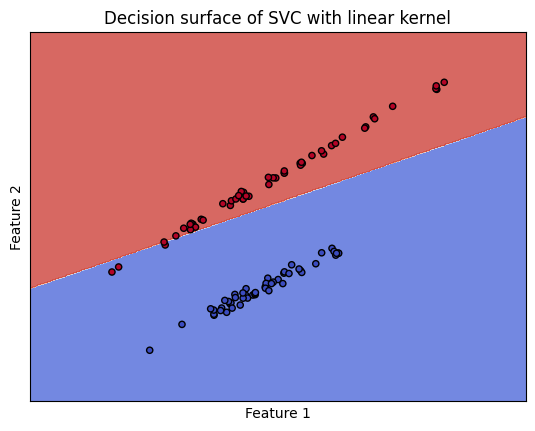


Kernel: poly
Akurasi: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


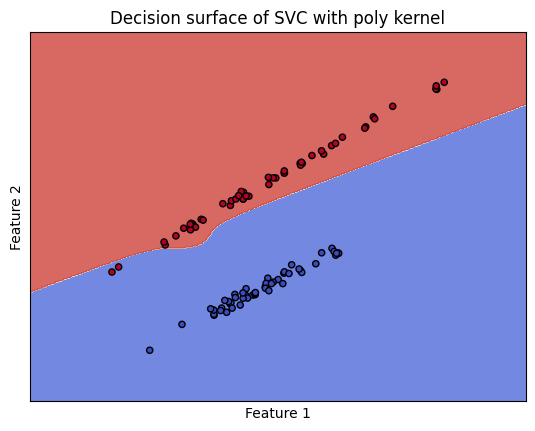


Kernel: rbf
Akurasi: 1.0
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
[[13  0]
 [ 0  7]]


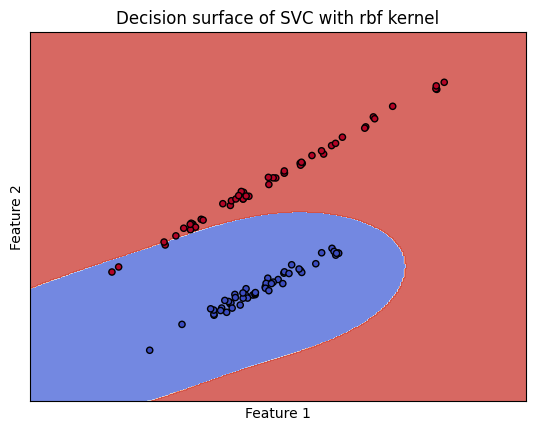


Kernel: sigmoid
Akurasi: 0.85
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.70      1.00      0.82         7

    accuracy                           0.85        20
   macro avg       0.85      0.88      0.85        20
weighted avg       0.89      0.85      0.85        20

Confusion Matrix:
[[10  3]
 [ 0  7]]


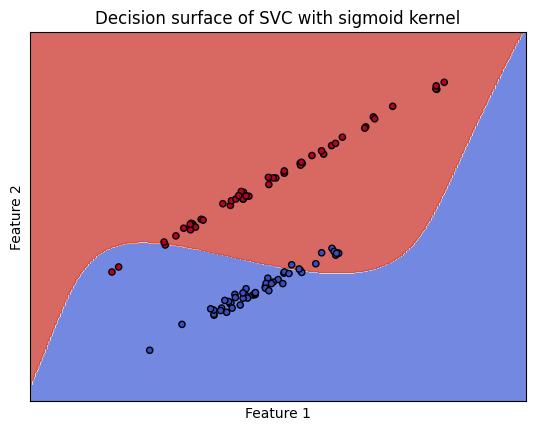

In [12]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
conf_matrices = []

for kernel in kernels:
    print(f'\nKernel: {kernel}')
    
    # Membuat model SVM dengan kernel yang ditentukan
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    
    # Memprediksi data pengujian
    y_pred = svm_model.predict(X_test)
    
    # Evaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Menyimpan hasil evaluasi
    accuracies.append(accuracy)
    conf_matrices.append(conf_matrix)
    
    # Menampilkan hasil evaluasi
    print(f'Akurasi: {accuracy}')
    print('Laporan Klasifikasi:')
    print(report)
    print('Confusion Matrix:')
    print(conf_matrix)
    
    # Visualisasi decision boundary
    fig, ax = plt.subplots()
    title = f'Decision surface of SVC with {kernel} kernel'
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, svm_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('Feature 2')
    ax.set_xlabel('Feature 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

### Berdasarkan hasil evaluasi yang diberikan untuk setiap kernel SVM:

### Kernel linear, poly, dan rbf:
- Semua kernel ini mencapai akurasi 1.0, yang berarti model SVM dengan ketiga kernel ini mampu memisahkan data dengan sempurna.
- Laporan klasifikasi menunjukkan bahwa model memiliki presisi, recall, dan f1-score yang sempurna untuk setiap kelas, menunjukkan kinerja yang sangat baik dalam klasifikasi.
- Confusion matrix menunjukkan bahwa tidak ada kebingungan antara kelas 0 dan 1, dengan semua prediksi yang benar-benar sesuai dengan label yang sebenarnya.

### Kernel sigmoid:
- Kernel sigmoid juga memberikan akurasi yang tinggi, meskipun sedikit lebih rendah dari tiga kernel sebelumnya (0.85).
- Namun, laporan klasifikasi menunjukkan sedikit penurunan kinerja dalam memprediksi kelas 0, dengan nilai recall yang sedikit lebih rendah dari kernel lainnya (0.77).
- Confusion matrix menunjukkan beberapa kebingungan, dengan tiga prediksi yang salah untuk kelas 0.

**Kesimpulannya**, model SVM dengan kernel linear, polynomial, dan RBF memberikan kinerja yang sangat baik dan mampu memisahkan data secara sempurna. Namun, kernel sigmoid juga memberikan hasil yang cukup baik meskipun sedikit di bawah ketiga kernel lainnya. Hal ini menunjukkan bahwa pemilihan kernel yang sesuai sangat penting dalam meningkatkan kinerja model SVM, tergantung pada sifat data yang diberikan. Dalam kasus ini, kernel linear, polynomial, dan RBF lebih disarankan untuk pemodelan karena kinerja yang lebih baik.


### Dengan menggunakan kode di atas, tujuan dari analisis data pada dataset "Credit Card Application Form" bisa menjadi beberapa hal:

1. **Pemodelan Prediksi Kelayakan**: Dengan menggunakan teknik pembelajaran mesin seperti SVM dengan berbagai jenis kernel, tujuan analisisnya untuk membangun model yang dapat memprediksi kelayakan atau persetujuan aplikasi kartu kredit. Model tersebut dapat melibatkan variabel-variabel pada dataset.

2. **Evaluasi Kinerja Model**: Setelah model SVM dengan berbagai kernel diterapkan, analisis data bertujuan untuk mengevaluasi kinerja masing-masing model. Ini termasuk mengukur akurasi prediksi, melihat laporan klasifikasi (presisi, recall, f1-score), serta menganalisis matriks kebingungan untuk memahami seberapa baik model memisahkan antara kelas yang berbeda (mis. aplikasi yang disetujui dan ditolak).

3. **Pemahaman Keputusan Model**: Dengan melakukan visualisasi decision boundary dari model SVM, analisis ini juga bertujuan untuk memahami bagaimana model membuat keputusan dalam ruang fitur. Ini bisa membantu dalam mengeksplorasi bagaimana variabel-variabel yang berbeda memengaruhi keputusan persetujuan kartu kredit.

Jadi, secara keseluruhan, tujuan dari analisis data ini adalah untuk membangun model prediktif yang baik untuk menilai kelayakan aplikasi kartu kredit, mengevaluasi kinerjanya, dan memahami faktor-faktor apa yang paling berpengaruh dalam keputusan persetujuan.